### EDA and Data prepocessing

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot
import psycopg2
import csv
import seaborn as sns
import scipy.stats as stats
import pylab
import feature_engine.outliers.winsorizer
from feature_engine.outliers.winsorizer import Winsorizer

In [ ]:
# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="medicine_db",
    user="postgres",
    password="namug1379")

In [ ]:
with conn.cursor() as cur:
    cur.execute("SELECT * FROM medicine_data")
    rows = cur.fetchall()

In [ ]:
for row in rows:
    print(row)
drug_data = pd.DataFrame(rows, columns=["Typeofsales","Patient_ID","Specialisation","Dept","Dateofbill","Quantity","ReturnQuantity","Final_Cost","Final_Sales","RtnMRP","Formulation","DrugName","SubCat","SubCat1"])

('Sale', 12018098765, 'Specialisation6', 'Department1', datetime.date(2022, 6, 1), 1, 0, Decimal('55.406'), Decimal('59.260'), Decimal('0.000'), 'Form1', 'ZINC ACETATE 20MG/5ML SYP', 'SYRUP & SUSPENSION', 'VITAMINS & MINERALS')
('Sale', 12018103897, 'Specialisation7', 'Department1', datetime.date(2022, 7, 23), 1, 0, Decimal('768.638'), Decimal('950.800'), Decimal('0.000'), 'Form1', 'CEFTAZIDIME 2GM+AVIBACTAM 500MG', 'INJECTIONS', 'ANTI-INFECTIVES')
('Sale', 12018101123, 'Specialisation2', 'Department3', datetime.date(2022, 6, 23), 1, 0, Decimal('774.266'), Decimal('4004.214'), Decimal('0.000'), 'Form2', 'EPTIFIBATIDE 0.75MG/ML', 'INJECTIONS', 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM')
('Sale', 12018079281, 'Specialisation40', 'Department1', datetime.date(2022, 3, 17), 2, 0, Decimal('40.798'), Decimal('81.044'), Decimal('0.000'), 'Form1', 'WATER FOR INJECTION 10ML SOLUTION', 'INJECTIONS', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 12018117928, 'Specialisation5', 'Department1', date

##### Import the dataset

In [ ]:
drug_data.head(10)

Typeofsales   Patient_ID    Specialisation         Dept  Dateofbill  \
0        Sale  12018098765   Specialisation6  Department1  2022-06-01   
1        Sale  12018103897   Specialisation7  Department1  2022-07-23   
2        Sale  12018101123   Specialisation2  Department3  2022-06-23   
3        Sale  12018079281  Specialisation40  Department1  2022-03-17   
4        Sale  12018117928   Specialisation5  Department1  2022-12-21   
5      Return  12018103662   Specialisation2  Department1  2022-07-15   
6        Sale  12018097585   Specialisation2  Department1  2022-05-22   
7        Sale  12018077721   Specialisation4  Department1  2022-01-12   
8        Sale  12018096500   Specialisation4  Department2  2022-08-24   
9        Sale  12018071649   Specialisation4  Department1  2022-08-31   

   Quantity  ReturnQuantity Final_Cost Final_Sales   RtnMRP Formulation  \
0         1               0     55.406      59.260    0.000       Form1   
1         1               0    768.638     950.800    0.000       Form1   
2         1               0    774.266    4004.214    0.000       Form2   
3         2               0     40.798      81.044    0.000       Form1   
4         1               0     40.434      40.504    0.000       Form1   
5         0               8     47.902       0.000  330.288       Form1   
6         1               0     41.862      42.218    0.000       Form1   
7         3               0     60.026     142.752    0.000       Form1   
8         2               0     49.856      94.000    0.000       Form2   
9         1               0    258.860     319.800    0.000       Form1   

                            DrugName                        SubCat  \
0          ZINC ACETATE 20MG/5ML SYP            SYRUP & SUSPENSION   
1    CEFTAZIDIME 2GM+AVIBACTAM 500MG                    INJECTIONS   
2             EPTIFIBATIDE 0.75MG/ML                    INJECTIONS   
3  WATER FOR INJECTION 10ML SOLUTION                    INJECTIONS   
4                      LORAZEPAM 1MG            TABLETS & CAPSULES   
5                   SALBUTAMOL 2.5MG           INHALERS & RESPULES   
6                 FUROSEMIDE 10MG/ML                    INJECTIONS   
7          SODIUM CHLORIDE IVF 100ML  IV FLUIDS, ELECTROLYTES, TPN   
8        SODIUM BICARBONATE 8.5% INJ                    INJECTIONS   
9          PEPTIDE BASED DIET POWDER       NUTRITIONAL SUPPLEMENTS   

                                 SubCat1  
0                    VITAMINS & MINERALS  
1                        ANTI-INFECTIVES  
2  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
3  INTRAVENOUS & OTHER STERILE SOLUTIONS  
4                 CENTRAL NERVOUS SYSTEM  
5                     RESPIRATORY SYSTEM  
6  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
7  INTRAVENOUS & OTHER STERILE SOLUTIONS  
8  INTRAVENOUS & OTHER STERILE SOLUTIONS  
9                              NUTRITION

In [ ]:
#Suppress the warnings
import warnings
warnings.filterwarnings("ignore")

##### shape of the dataframe

In [ ]:
print(drug_data.shape)

(14218, 14)


In [ ]:
date_column = 'Dateofbill'
drug_data[date_column] = pd.to_datetime(drug_data[date_column])
# sort the dataset by the date column in ascending order
drug_data = drug_data.sort_values(by=date_column, ascending=True)

#sorted dataset
drug_data.to_csv('Projectfinaldata.csv', index=False)


In [ ]:
drug_data.head()

Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
2274         Sale  12018081605   Specialisation2  Department1 2022-01-01   
11538        Sale  12018081605   Specialisation2  Department1 2022-01-01   
9779         Sale  12018081582   Specialisation3  Department1 2022-01-01   
3755         Sale  12018081111  Specialisation11  Department2 2022-01-01   
14173        Sale  12018075045   Specialisation4  Department1 2022-01-01   

       Quantity  ReturnQuantity Final_Cost Final_Sales RtnMRP Formulation  \
2274          2               0     62.244     111.720  0.000       Form1   
11538         1               0     40.838      40.972  0.000       Form1   
9779          3               0     66.208     448.680  0.000       Form1   
3755          1               0     44.928      46.760  0.000       Form1   
14173         1               0     47.824      49.780  0.000       Form1   

                     DrugName                        SubCat  \
2274     SODIUM CHLORIDE 0.9%  IV FLUIDS, ELECTROLYTES, TPN   
11538            ASPIRIN 75MG            TABLETS & CAPSULES   
9779   PARACETAMOL 1GM IV INJ                    INJECTIONS   
3755           EPHEDRINE 30MG                    INJECTIONS   
14173    FLUCONAZOLE 50MG TAB            TABLETS & CAPSULES   

                                     SubCat1  
2274   INTRAVENOUS & OTHER STERILE SOLUTIONS  
11538  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
9779                  CENTRAL NERVOUS SYSTEM  
3755   CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
14173                        ANTI-INFECTIVES

In [ ]:
# specify the column to round
column_name = 'Final_Cost'

# specify the number of decimal places to round to
decimal_places = 0

# round the values in the column to the specified number of decimal places
drug_data[column_name] = drug_data[column_name].apply(lambda x: round(x, decimal_places))

# specify the column to round
column_name1 = 'Final_Sales'

# specify the number of decimal places to round to
decimal_places1 = 0

# round the values in the column to the specified number of decimal places
drug_data[column_name1] = drug_data[column_name1].apply(lambda x: round(x, decimal_places1))

# write the updated dataset to a new CSV file
drug_data.to_csv('Projectfinaldata.csv', index=False)

In [ ]:
# drug_data['Final_Quantity'] = drug_data.Quantity - drug_data.ReturnQuantity

In [ ]:
# drug_data.drop(columns=["Quantity"], axis =1, inplace = True)

In [ ]:
drug_data.drop(columns=["ReturnQuantity"], axis =1, inplace = True)

In [ ]:
drug_data.head(10)

Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
2274         Sale  12018081605   Specialisation2  Department1 2022-01-01   
11538        Sale  12018081605   Specialisation2  Department1 2022-01-01   
9779         Sale  12018081582   Specialisation3  Department1 2022-01-01   
3755         Sale  12018081111  Specialisation11  Department2 2022-01-01   
14173        Sale  12018075045   Specialisation4  Department1 2022-01-01   
10887        Sale  12018072994   Specialisation7  Department1 2022-01-01   
7361         Sale  12018071419   Specialisation4  Department2 2022-01-01   
8021         Sale  12018071419   Specialisation4  Department2 2022-01-01   
11763        Sale  12018080728   Specialisation4  Department1 2022-01-01   
2438         Sale  12018080296  Specialisation27  Department1 2022-01-01   

       Quantity Final_Cost Final_Sales RtnMRP Formulation  \
2274          2         62         112  0.000       Form1   
11538         1         41          41  0.000       Form1   
9779          3         66         449  0.000       Form1   
3755          1         45          47  0.000       Form1   
14173         1         48          50  0.000       Form1   
10887         1        960        1488  0.000       Form1   
7361          1         44          47  0.000       Form1   
8021          1         52          56  0.000       Form2   
11763         1         72          82  0.000       Form1   
2438          3         66         449  0.000       Form1   

                                 DrugName                        SubCat  \
2274                 SODIUM CHLORIDE 0.9%  IV FLUIDS, ELECTROLYTES, TPN   
11538                        ASPIRIN 75MG            TABLETS & CAPSULES   
9779               PARACETAMOL 1GM IV INJ                    INJECTIONS   
3755                       EPHEDRINE 30MG                    INJECTIONS   
14173                FLUCONAZOLE 50MG TAB            TABLETS & CAPSULES   
10887               HUMAN ALBUMIN 25% INJ  IV FLUIDS, ELECTROLYTES, TPN   
7361      LIGNOCAINE HYDROCHLORIDE 2% INJ      OINTMENTS, CREAMS & GELS   
8021                 SODIUM CHLORIDE 0.9%  IV FLUIDS, ELECTROLYTES, TPN   
11763  LIQUID PARAFFIN + MILK OF MAGNESIA            SYRUP & SUSPENSION   
2438               PARACETAMOL 1GM IV INJ                    INJECTIONS   

                                       SubCat1  
2274     INTRAVENOUS & OTHER STERILE SOLUTIONS  
11538    CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
9779                    CENTRAL NERVOUS SYSTEM  
3755     CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
14173                          ANTI-INFECTIVES  
10887    INTRAVENOUS & OTHER STERILE SOLUTIONS  
7361                              ANAESTHETICS  
8021     INTRAVENOUS & OTHER STERILE SOLUTIONS  
11763  GASTROINTESTINAL & HEPATOBILIARY SYSTEM  
2438                    CENTRAL NERVOUS SYSTEM

In [ ]:
drug_data.describe()

Patient_ID      Quantity
count  1.421800e+04  14218.000000
mean   1.201809e+10      2.231748
std    2.810229e+04      5.132043
min    1.201800e+10      0.000000
25%    1.201808e+10      1.000000
50%    1.201809e+10      1.000000
75%    1.201811e+10      2.000000
max    1.201813e+10    150.000000

##### 1st business moment decision[Measure of Central Tendancy] (mean,median,mode)

In [ ]:
#mean
print(drug_data.mean())

Patient_ID     1.201809e+10
Quantity       2.231748e+00
Final_Cost     1.248167e+02
Final_Sales    2.340812e+02
RtnMRP         2.912675e+01
dtype: float64


In [ ]:
#median
print(drug_data.median())

Patient_ID     1.201809e+10
Quantity       1.000000e+00
Final_Cost     5.400000e+01
Final_Sales    8.600000e+01
RtnMRP         0.000000e+00
dtype: float64


In [ ]:
#mode
drug_data.mode()

Typeofsales    Patient_ID   Specialisation         Dept Dateofbill  \
0        Sale  1.201807e+10  Specialisation4  Department1 2022-07-07   
1         NaN           NaN              NaN          NaN 2022-07-09   

   Quantity Final_Cost Final_Sales RtnMRP Formulation  \
0       1.0         42           0  0.000       Form1   
1       NaN        NaN         NaN    NaN         NaN   

                    DrugName      SubCat  \
0  SODIUM CHLORIDE IVF 100ML  INJECTIONS   
1                        NaN         NaN   

                                 SubCat1  
0  INTRAVENOUS & OTHER STERILE SOLUTIONS  
1                                    NaN

##### 2nd business moment decision[Measure of Central Dispersion] Variance,Standard deviation ,Range

In [ ]:
#Variance
drug_data.var()

Patient_ID    7.897389e+08
Quantity      2.633786e+01
dtype: float64

In [ ]:
#Std

print(drug_data.std())

Patient_ID                   28102.293889
Dateofbill    104 days 11:58:05.936657802
Quantity                         5.132043
dtype: object


##### 3rd Business Moment
##### Skewness(Measure of asymmetry in distribution)

In [ ]:
drug_data.skew()

Patient_ID     -1.366038
Quantity       11.341034
Final_Cost     34.507846
Final_Sales    21.007574
RtnMRP         15.797853
dtype: float64

##### Kurtosis: Measure of peakedness - represents the overall spread in the data

In [ ]:
drug_data.kurt()

Patient_ID        1.620651
Quantity        180.153858
Final_Cost     2025.845677
Final_Sales     948.581412
RtnMRP          403.524941
dtype: float64

#### Graphical Representation

In [ ]:
drug_data.Quantity.max()

150

(0.0, 160.0)

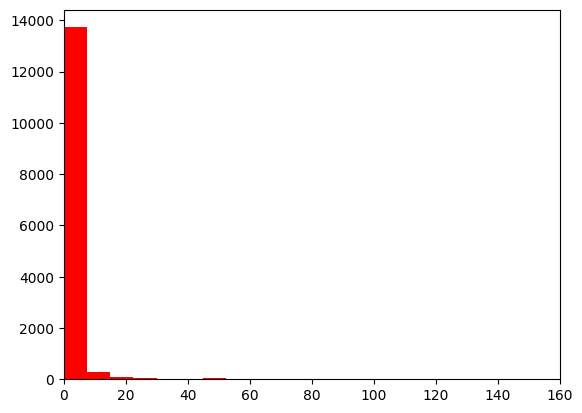

In [ ]:
plt.hist(drug_data.Quantity, color = 'red', bins = 20, alpha = 1)
plt.xlim(0,160)

In [ ]:
drug_data.Final_Cost.max()

Decimal('33178')

(0.0, 3500.0)

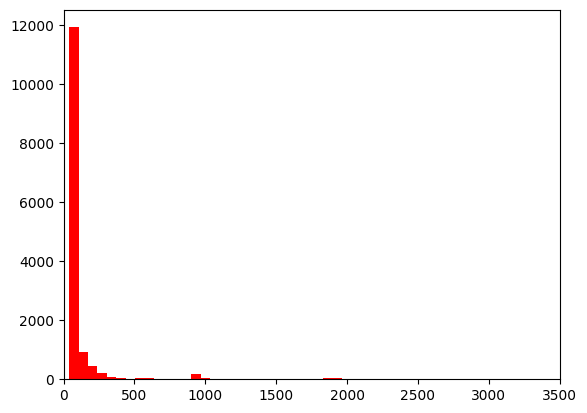

In [ ]:
plt.hist(drug_data.Final_Cost, color = 'red', bins = 500, alpha = 1)
plt.xlim(0,3500)

In [ ]:
drug_data.Final_Sales.max()

Decimal('39490')

(0.0, 4000.0)

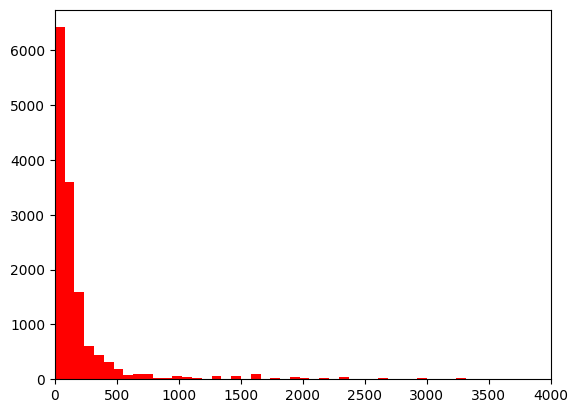

In [ ]:
plt.hist(drug_data.Final_Sales, color = 'red', bins = 500, alpha = 1)
plt.xlim(0,4000)

In [ ]:
#its positively skewed, means greater than median

In [ ]:
drug_data.RtnMRP.max()

Decimal('8014.000')

(0.0, 1000.0)

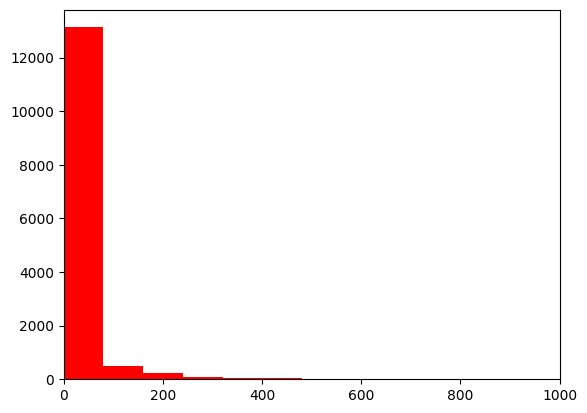

In [ ]:
plt.hist(drug_data.RtnMRP, color = 'red', bins = 100, alpha = 1)
plt.xlim(0,1000)

### Data Preprocessing

##### Type Casting

In [ ]:
drug_data["Patient_ID"]=drug_data["Patient_ID"].astype('str')

##### duplicates

In [ ]:
dupli = drug_data.duplicated()
sum(dupli)

27

##### missing values

In [ ]:
drug_data.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1668
SubCat1           1692
dtype: int64

In [ ]:
# Define the list of columns to be used for grouping
group_cols = ['Typeofsales', 'Specialisation','Dept']

In [ ]:
# Impute missing values in Formulation column based on the mode of the group
for col in ['Formulation', 'DrugName', 'SubCat', 'SubCat1']:
    drug_data[col]=drug_data.groupby(group_cols)[col].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [ ]:
drug_data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       3
DrugName          6
SubCat            6
SubCat1           6
dtype: int64

In [ ]:
#Still there are some missing values so we dropped them
drug_data.dropna(inplace=True)
drug_data= drug_data.reset_index(drop=True)
drug_data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [ ]:
drug_data.head(10)

Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
0        Sale  12018081605   Specialisation2  Department1 2022-01-01   
1        Sale  12018081605   Specialisation2  Department1 2022-01-01   
2        Sale  12018081582   Specialisation3  Department1 2022-01-01   
3        Sale  12018081111  Specialisation11  Department2 2022-01-01   
4        Sale  12018075045   Specialisation4  Department1 2022-01-01   
5        Sale  12018072994   Specialisation7  Department1 2022-01-01   
6        Sale  12018071419   Specialisation4  Department2 2022-01-01   
7        Sale  12018071419   Specialisation4  Department2 2022-01-01   
8        Sale  12018080728   Specialisation4  Department1 2022-01-01   
9        Sale  12018080296  Specialisation27  Department1 2022-01-01   

   Quantity Final_Cost Final_Sales RtnMRP Formulation  \
0         2         62         112  0.000       Form1   
1         1         41          41  0.000       Form1   
2         3         66         449  0.000       Form1   
3         1         45          47  0.000       Form1   
4         1         48          50  0.000       Form1   
5         1        960        1488  0.000       Form1   
6         1         44          47  0.000       Form1   
7         1         52          56  0.000       Form2   
8         1         72          82  0.000       Form1   
9         3         66         449  0.000       Form1   

                             DrugName                        SubCat  \
0                SODIUM CHLORIDE 0.9%  IV FLUIDS, ELECTROLYTES, TPN   
1                        ASPIRIN 75MG            TABLETS & CAPSULES   
2              PARACETAMOL 1GM IV INJ                    INJECTIONS   
3                      EPHEDRINE 30MG                    INJECTIONS   
4                FLUCONAZOLE 50MG TAB            TABLETS & CAPSULES   
5               HUMAN ALBUMIN 25% INJ  IV FLUIDS, ELECTROLYTES, TPN   
6     LIGNOCAINE HYDROCHLORIDE 2% INJ      OINTMENTS, CREAMS & GELS   
7                SODIUM CHLORIDE 0.9%  IV FLUIDS, ELECTROLYTES, TPN   
8  LIQUID PARAFFIN + MILK OF MAGNESIA            SYRUP & SUSPENSION   
9              PARACETAMOL 1GM IV INJ                    INJECTIONS   

                                   SubCat1  
0    INTRAVENOUS & OTHER STERILE SOLUTIONS  
1    CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
2                   CENTRAL NERVOUS SYSTEM  
3    CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
4                          ANTI-INFECTIVES  
5    INTRAVENOUS & OTHER STERILE SOLUTIONS  
6                             ANAESTHETICS  
7    INTRAVENOUS & OTHER STERILE SOLUTIONS  
8  GASTROINTESTINAL & HEPATOBILIARY SYSTEM  
9                   CENTRAL NERVOUS SYSTEM

In [ ]:
# changing date formate to month
drug_data['Dateofbill'] = pd.to_datetime(drug_data['Dateofbill'])
drug_data['Dateofbill'] = drug_data['Dateofbill'].dt.strftime('%b')
drug_data.head()

Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
0        Sale  12018081605   Specialisation2  Department1        Jan   
1        Sale  12018081605   Specialisation2  Department1        Jan   
2        Sale  12018081582   Specialisation3  Department1        Jan   
3        Sale  12018081111  Specialisation11  Department2        Jan   
4        Sale  12018075045   Specialisation4  Department1        Jan   

   Quantity Final_Cost Final_Sales RtnMRP Formulation                DrugName  \
0         2         62         112  0.000       Form1    SODIUM CHLORIDE 0.9%   
1         1         41          41  0.000       Form1            ASPIRIN 75MG   
2         3         66         449  0.000       Form1  PARACETAMOL 1GM IV INJ   
3         1         45          47  0.000       Form1          EPHEDRINE 30MG   
4         1         48          50  0.000       Form1    FLUCONAZOLE 50MG TAB   

                         SubCat                                SubCat1  
0  IV FLUIDS, ELECTROLYTES, TPN  INTRAVENOUS & OTHER STERILE SOLUTIONS  
1            TABLETS & CAPSULES  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
2                    INJECTIONS                 CENTRAL NERVOUS SYSTEM  
3                    INJECTIONS  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
4            TABLETS & CAPSULES                        ANTI-INFECTIVES

In [ ]:
# # Pivot the DataFrame
# df_pivoted = df_grouped.pivot_table(index="DrugName", columns="Dateofbill", values="Final_Quantity")

# # Show the result
# df_pivoted.head()

##### Data Distribution

((array([-3.89659319, -3.67612989, -3.55530468, ...,  3.55530468,
          3.67612989,  3.89659319]),
  array([  0,   0,   0, ..., 100, 100, 150], dtype=int64)),
 (2.657308324135168, 2.232371569317382, 0.5175368866988735))

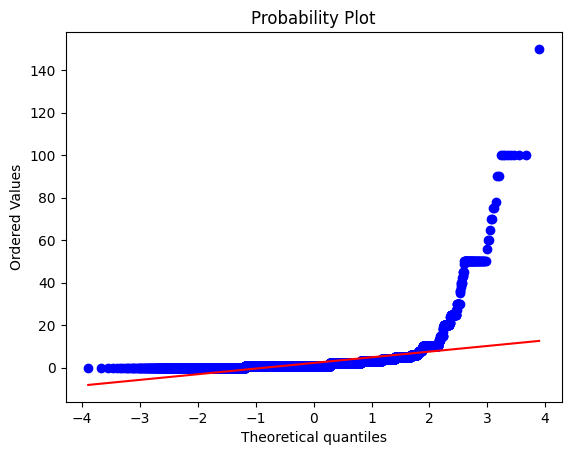

In [ ]:
# Checking Whether data is normally distributed
stats.probplot(drug_data.Quantity, dist="norm", plot=pylab)

((array([-3.89659319, -3.67612989, -3.55530468, ...,  3.55530468,
          3.67612989,  3.89659319]),
  array([      -inf,       -inf,       -inf, ..., 4.60517019, 4.60517019,
         5.01063529])),
 (nan, nan, nan))

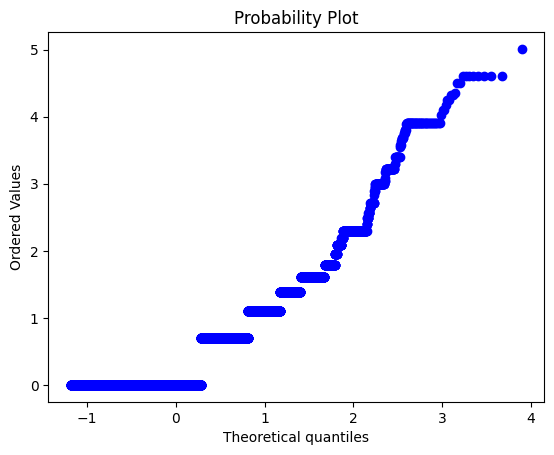

In [ ]:
#transformation to make variable normal
stats.probplot(np.log(drug_data.Quantity),dist="norm",plot=pylab)

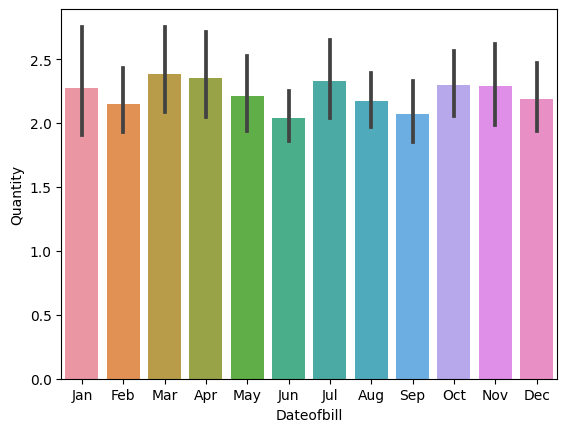

In [ ]:
sns.barplot(data = drug_data, x = 'Dateofbill', y = 'Quantity');
plt.show()

##### In March, April, jul, sep has highest quantity sold. and its same

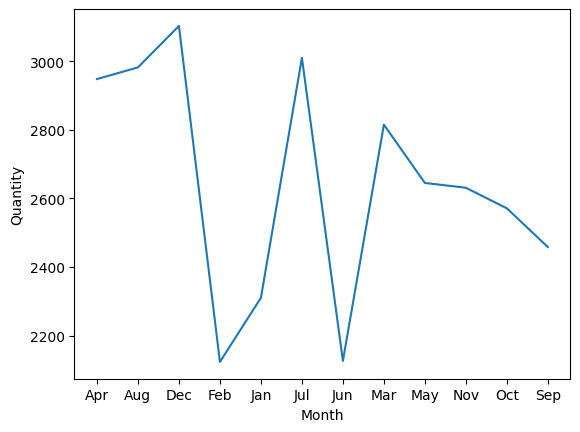

In [ ]:
Month = drug_data.groupby('Dateofbill')['Quantity'].sum()
plt.plot(Month.index, Month.values)
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.show()

In [ ]:
# import dtale as dt

In [ ]:
# dt.show(drug_data)

In [ ]:
#import sweetviz as sv

In [ ]:
#s = sv.analyze(drug_data)

In [ ]:
# s.show_html()

In [ ]:
# pip install autoviz

In [ ]:
# from autoviz.AutoViz_Class import AutoViz_Class

In [ ]:
# av = AutoViz_Class()

In [ ]:
# a = av.AutoViz(r"G:\Project\dataset\01. Final Dataset\FinalDataset.csv")

In [ ]:
# autoviz = AutoViz_Class().AutoViz(r"G:\Project\dataset\01. Final Dataset\FinalDataset.csv")

In [ ]:
df_grouped = drug_data[['Dateofbill','Quantity']]

In [ ]:
# Group by Quantty and Month
df_grouped = df_grouped.groupby('Dateofbill').sum()
# Show the result
df_grouped.head(10)
df_grouped = df_grouped.reset_index()
df_grouped

Dateofbill  Quantity
0         Apr      2948
1         Aug      2982
2         Dec      3103
3         Feb      2123
4         Jan      2310
5         Jul      3010
6         Jun      2126
7         Mar      2815
8         May      2645
9         Nov      2631
10        Oct      2571
11        Sep      2458

In [ ]:
# create a dictionary to map month names to their numerical values
dict_month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# create a new column with the numerical values of the months
df_grouped['Monthindex'] = df_grouped['Dateofbill'].map(dict_month)

df_grouped = df_grouped.sort_values(by='Monthindex')

In [ ]:
# drop the Monthindex column
df_grouped = df_grouped.drop(columns=['Monthindex'])
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

Dateofbill  Quantity
0         Jan      2310
1         Feb      2123
2         Mar      2815
3         Apr      2948
4         May      2645
5         Jun      2126
6         Jul      3010
7         Aug      2982
8         Sep      2458
9         Oct      2571
10        Nov      2631
11        Dec      3103

In [ ]:
data1 = pd.get_dummies(df_grouped.Dateofbill)
data1.columns

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [ ]:
data = pd.concat([df_grouped , data1] , axis = 1)
data

Dateofbill  Quantity  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0         Jan      2310    0    0    0    0    1    0    0    0    0    0   
1         Feb      2123    0    0    0    1    0    0    0    0    0    0   
2         Mar      2815    0    0    0    0    0    0    0    1    0    0   
3         Apr      2948    1    0    0    0    0    0    0    0    0    0   
4         May      2645    0    0    0    0    0    0    0    0    1    0   
5         Jun      2126    0    0    0    0    0    0    1    0    0    0   
6         Jul      3010    0    0    0    0    0    1    0    0    0    0   
7         Aug      2982    0    1    0    0    0    0    0    0    0    0   
8         Sep      2458    0    0    0    0    0    0    0    0    0    0   
9         Oct      2571    0    0    0    0    0    0    0    0    0    0   
10        Nov      2631    0    0    0    0    0    0    0    0    0    1   
11        Dec      3103    0    0    1    0    0    0    0    0    0    0   

    Oct  Sep  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  
5     0    0  
6     0    0  
7     0    0  
8     0    1  
9     1    0  
10    0    0  
11    0    0

In [ ]:
data['log_Quantity'] = np.log(data['Quantity'])
data

Dateofbill  Quantity  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0         Jan      2310    0    0    0    0    1    0    0    0    0    0   
1         Feb      2123    0    0    0    1    0    0    0    0    0    0   
2         Mar      2815    0    0    0    0    0    0    0    1    0    0   
3         Apr      2948    1    0    0    0    0    0    0    0    0    0   
4         May      2645    0    0    0    0    0    0    0    0    1    0   
5         Jun      2126    0    0    0    0    0    0    1    0    0    0   
6         Jul      3010    0    0    0    0    0    1    0    0    0    0   
7         Aug      2982    0    1    0    0    0    0    0    0    0    0   
8         Sep      2458    0    0    0    0    0    0    0    0    0    0   
9         Oct      2571    0    0    0    0    0    0    0    0    0    0   
10        Nov      2631    0    0    0    0    0    0    0    0    0    1   
11        Dec      3103    0    0    1    0    0    0    0    0    0    0   

    Oct  Sep  log_Quantity  
0     0    0      7.745003  
1     0    0      7.660585  
2     0    0      7.942718  
3     0    0      7.988882  
4     0    0      7.880426  
5     0    0      7.661998  
6     0    0      8.009695  
7     0    0      8.000349  
8     0    1      7.807103  
9     1    0      7.852050  
10    0    0      7.875119  
11    0    0      8.040125

In [ ]:
data["t"] = np.arange(1,13)

data["t_square"] = data["t"] * data["t"]
data

Dateofbill  Quantity  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0         Jan      2310    0    0    0    0    1    0    0    0    0    0   
1         Feb      2123    0    0    0    1    0    0    0    0    0    0   
2         Mar      2815    0    0    0    0    0    0    0    1    0    0   
3         Apr      2948    1    0    0    0    0    0    0    0    0    0   
4         May      2645    0    0    0    0    0    0    0    0    1    0   
5         Jun      2126    0    0    0    0    0    0    1    0    0    0   
6         Jul      3010    0    0    0    0    0    1    0    0    0    0   
7         Aug      2982    0    1    0    0    0    0    0    0    0    0   
8         Sep      2458    0    0    0    0    0    0    0    0    0    0   
9         Oct      2571    0    0    0    0    0    0    0    0    0    0   
10        Nov      2631    0    0    0    0    0    0    0    0    0    1   
11        Dec      3103    0    0    1    0    0    0    0    0    0    0   

    Oct  Sep  log_Quantity   t  t_square  
0     0    0      7.745003   1         1  
1     0    0      7.660585   2         4  
2     0    0      7.942718   3         9  
3     0    0      7.988882   4        16  
4     0    0      7.880426   5        25  
5     0    0      7.661998   6        36  
6     0    0      8.009695   7        49  
7     0    0      8.000349   8        64  
8     0    1      7.807103   9        81  
9     1    0      7.852050  10       100  
10    0    0      7.875119  11       121  
11    0    0      8.040125  12       144

##### Trend in Quantity

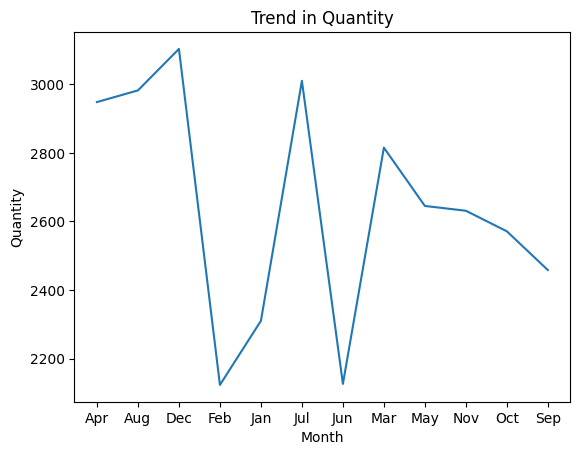

In [ ]:
# Group the data by month and calculate the sum of Quantity
monthSale = drug_data.groupby(['Dateofbill'])['Quantity'].sum()

# Create a line chart
plt.plot(monthSale.index, monthSale.values)

# Add a title to the chart
plt.title('Trend in Quantity')

# Add labels to the x and y axes
plt.xlabel('Month')
plt.ylabel('Quantity')

# Show the chart
plt.show()

#### Model Building

##### Linear

In [ ]:
# Data Partition
Train = data
Test = data

In [ ]:
import statsmodels.formula.api as smf

linear = smf.ols('Quantity ~ t', data = Train).fit()
pickle.dump(linear,open('linear_model.pkl','wb'))

In [ ]:
pred_linear =  pd.Series(linear.predict(pd.DataFrame(Test['t'])))
mape_linear = np.mean(np.abs((Test['Quantity'] - (pred_linear)) / Test['Quantity'])) * 100
mape_linear

10.607710652093777

##### Exponential

In [ ]:
Exponential = smf.ols('log_Quantity ~ t', data = Train).fit()
pred_Exponential = pd.Series(Exponential.predict(pd.DataFrame(Test['t'])))

In [ ]:
mape_Exponential = np.mean(np.abs((Test['Quantity'] - np.exp(pred_Exponential)) / Test['Quantity'])) * 100
mape_Exponential

10.56804288800784

##### Quadratic

In [ ]:
Quadratic = smf.ols('Quantity ~ t + t_square', data = Train).fit()
pred_Quadratic = pd.Series(Quadratic.predict(Test[["t", "t_square"]]))

In [ ]:
mape_Quadratic = np.mean(np.abs((Test['Quantity'] - (pred_Quadratic)) / Test['Quantity'])) * 100
mape_Quadratic

10.231108509993547

##### Additive seasonality

In [ ]:
addSeasonality = smf.ols('Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=Train).fit()
pred_addSeasonality = pd.Series(addSeasonality.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))

In [ ]:
mape_addSeasonality = np.mean(np.abs((Test['Quantity'] - (pred_addSeasonality)) / Test['Quantity'])) * 100
mape_addSeasonality

1.0118261319172287e-13

##### Multiplicative Seasonality

In [ ]:
MulSeasonality = smf.ols('log_Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_MultSeasonality = pd.Series(MulSeasonality.predict(Test))
mape_MultSeasonality = np.mean(np.abs((Test['Quantity'] - np.exp(pred_MultSeasonality)) / Test['Quantity'])) * 100
mape_MultSeasonality

6.863908885625611e-13

##### Additive Seasonality Quadratic Trend

In [ ]:
add_seaQuadratic = smf.ols('Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_seaQuadratic = pd.Series(add_seaQuadratic.predict(Test[['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov' , 'Oct' , 'Sep' ,'t','t_square']]))
mape_add_seaQuadratic = np.mean(np.abs((Test['Quantity'] - (pred_add_seaQuadratic)) / Test['Quantity'])) * 100
mape_add_seaQuadratic

1.3471512607393857e-12

##### Multiplicative Seasonality Linear Trend

In [ ]:
Mul_SeasonalityLinear = smf.ols('log_Quantity ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_MultSeasonalityLinear = pd.Series(Mul_SeasonalityLinear.predict(Test))

In [ ]:
mape_MultSeasonalityLinear = np.mean(np.abs((Test['Quantity'] - np.exp(pred_MultSeasonalityLinear)) / Test['Quantity'])) * 100
mape_MultSeasonalityLinear

1.7057107356998991e-12

In [ ]:
data1 = {"MODEL":pd.Series(["mape_linear","mape_Exponential","mape_Quadratic","mape_addSeasonality","mape_MultSeasonality","mape_add_seaQuadratic","mape_MultSeasonalityLinear"]),"MAPE_Values":pd.Series([mape_linear,mape_Exponential,mape_Quadratic,mape_addSeasonality,mape_MultSeasonality,mape_add_seaQuadratic,mape_MultSeasonalityLinear])}
table_mape = pd.DataFrame(data1)
table_mape

MODEL   MAPE_Values
0                 mape_linear  1.060771e+01
1            mape_Exponential  1.056804e+01
2              mape_Quadratic  1.023111e+01
3         mape_addSeasonality  1.011826e-13
4        mape_MultSeasonality  6.863909e-13
5       mape_add_seaQuadratic  1.347151e-12
6  mape_MultSeasonalityLinear  1.705711e-12

In [ ]:
model_full = smf.ols('Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()

In [ ]:
predict_data = data
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

0     2310.0
1     2123.0
2     2815.0
3     2948.0
4     2645.0
5     2126.0
6     3010.0
7     2982.0
8     2458.0
9     2571.0
10    2631.0
11    3103.0
dtype: float64

In [ ]:
predict_data["forecasted_Quantity"] = pd.Series(pred_new)

In [ ]:
model_full.save("model.pickle")

In [ ]:
#load model
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

##### Autoregression Model

In [ ]:
# Calculating Residuals from best model applied on full data
# AV - FV
full_res = data.Quantity - model_full.predict(data)

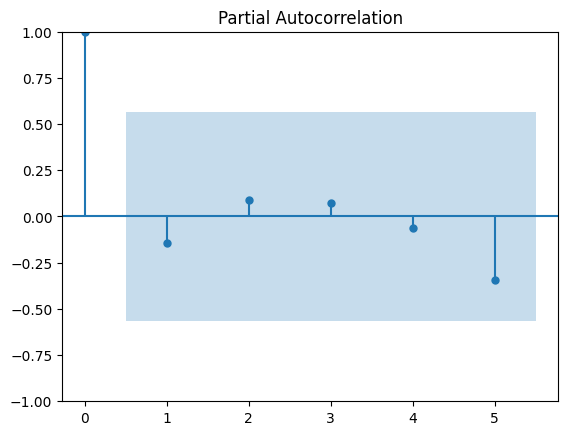

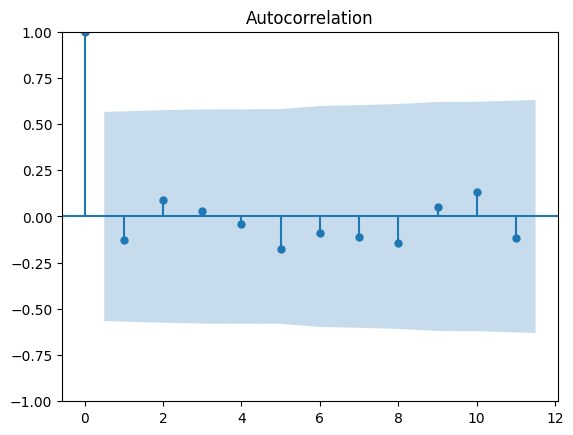

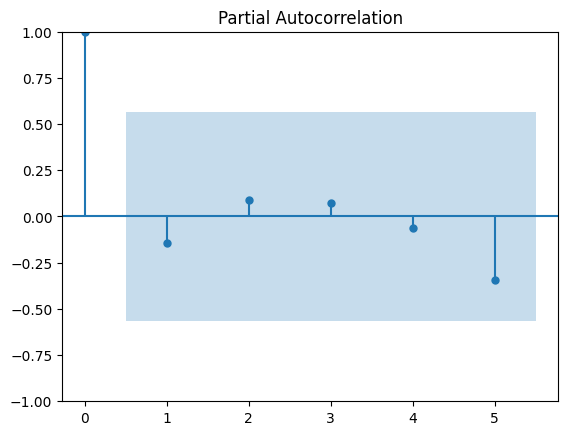

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA

tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [ ]:
# AR model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])
# model_ar = AutoReg(Train_res, lags=12)
model_fit = model_ar.fit()

print('Coefficients: %s' % model_fit.params)

pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(predict_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)

# The Final Predictions using ASQT and AR(1) Model
final_pred = pred_new + pred_res
final_pred

Coefficients: const    4.155340e-11
y.L1    -1.352924e-01
dtype: float64


0     2310.0
1     2123.0
2     2815.0
3     2948.0
4     2645.0
5     2126.0
6     3010.0
7     2982.0
8     2458.0
9     2571.0
10    2631.0
11    3103.0
dtype: float64

#### ARIMA MODEL

In [ ]:
train = df_grouped
test= df_grouped
train

Dateofbill  Quantity
0         Jan      2310
1         Feb      2123
2         Mar      2815
3         Apr      2948
4         May      2645
5         Jun      2126
6         Jul      3010
7         Aug      2982
8         Sep      2458
9         Oct      2571
10        Nov      2631
11        Dec      3103

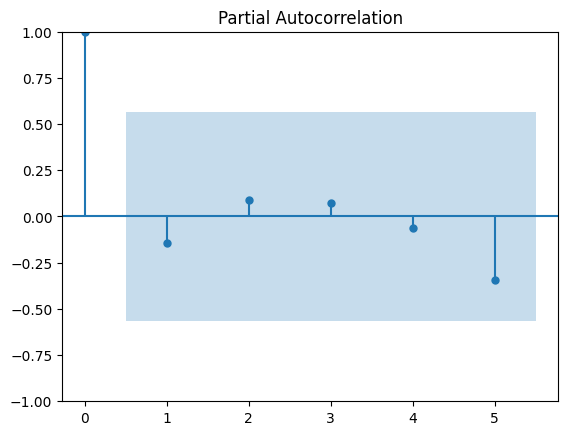

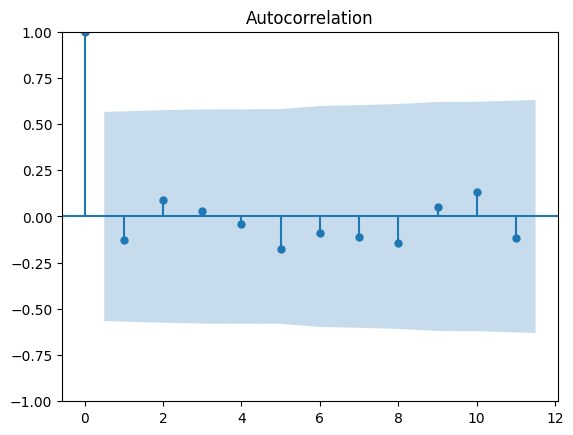

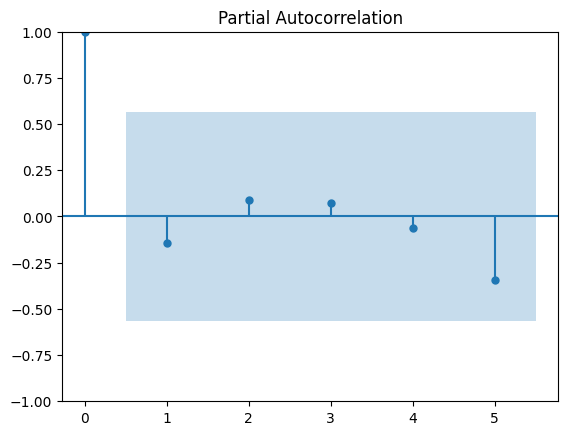

In [ ]:
tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [ ]:
model1 = ARIMA(train.Quantity, order = (5,1,2))
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -100.709
Date:                Thu, 30 Mar 2023   AIC                            217.418
Time:                        22:52:18   BIC                            220.601
Sample:                             0   HQIC                           215.411
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7478      0.035    -21.637      0.000      -0.816      -0.680
ar.L2         -0.3129      0.019    -16.896      0.000      -0.349      -0.277
ar.L3          0.3086      0.019     16.665      0.000       0.272       0.345
ar.L4          0.7447      0.035     21.383      0.000       0.676       0.813
ar.L5          0.9989      0.000   2531.735      0.000       0.998       1.000
ma.L1          0.0017      0.135      0.013      0.990      -0.262       0.266
ma.L2         -0.9983      0.155     -6.422      0.000      -1.303      -0.694
sigma2      1921.9416   5.04e-05   3.82e+07      0.000    1921.942    1921.942
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.27   Prob(JB):                         0.63
Heteroskedasticity (H):               1.07   Skew:                             0.18
Prob(H) (two-sided):                  0.95   Kurtosis:                         1.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.9e+23. Standard errors may be unstable.
"""

In [ ]:
start_index = len(train)
start_index
end_index = start_index + 11
forecast_test = res1.predict(start = start_index, end = end_index)

In [ ]:
forecast_test = pd.DataFrame(forecast_test)
forecast_test

predicted_mean
12     2419.057379
13     2425.161292
14     2937.832348
15     2752.901153
16     2694.797146
17     2275.708899
18     2938.081057
19     2930.351175
20     2371.537186
21     2626.121619
22     2682.865630
23     3044.178023

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_test = sqrt(mean_squared_error(test.Quantity, forecast_test))

print('test RMSE: %.3f' % rmse_test)

test RMSE: 130.940


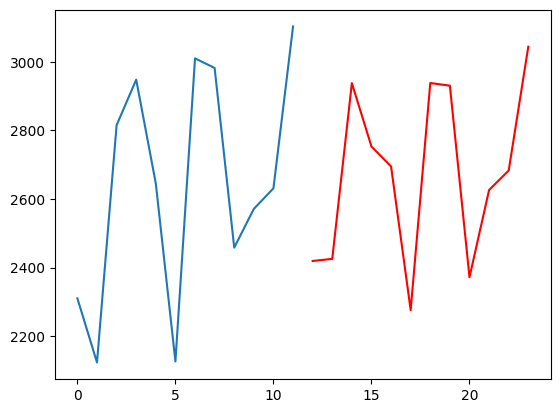

In [ ]:
plt.plot(test.Quantity)
plt.plot(forecast_test, color = 'red')
plt.show()

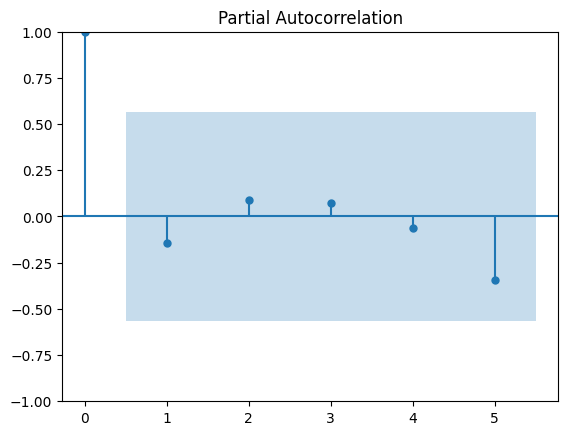

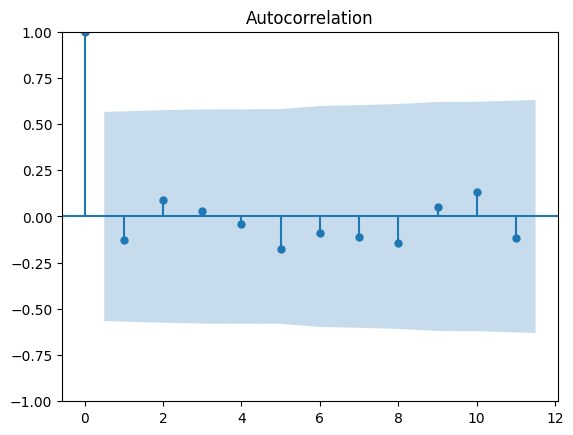

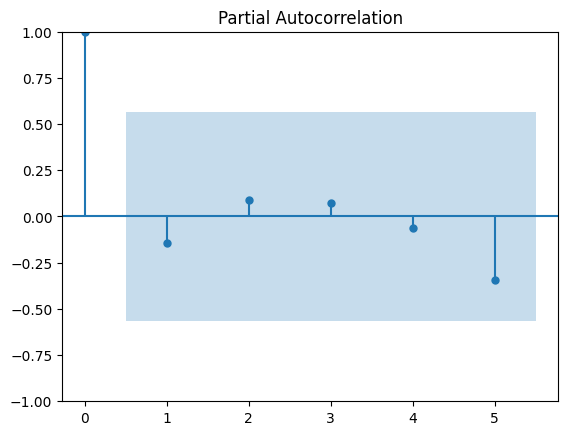

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA

tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [ ]:
import pmdarima as pm
# help(pm.auto_arima)

ar_model = pm.auto_arima(train.Quantity, start_p = 0, start_q = 0,
                      max_p = 16, max_q = 16, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0, trace = True,
                      error_action = 'warn', stepwise = True)

# Print model summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=225.352, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=188.015, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=186.501, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.455 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                nan
Time:                        22:55:40   Log-Likelihood:                 268.97
No. Observations:                  12   AIC:                            -513.9
Df Residuals:                       0   BIC:                            -508.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1180.1590        inf          0        nan         nan         nan
t            425.6395        inf          0        nan         nan         nan
t_square     -25.8768        inf         -0        nan         nan         nan
Jan          730.0783        inf          0        nan         nan         nan
Feb          195.0693        inf          0        nan         nan         nan
Mar          590.8140        inf          0        nan         nan         nan
Apr          479.3124        inf          0        nan         nan         nan
May          -16.4355        inf         -0        nan         nan         nan
Jun         -676.4297        inf         -0        nan         nan         nan
Jul          118.3298        inf          0        nan         nan         nan
Aug           52.8429        inf          0        nan         nan         nan
Sep         -456.8902        inf         -0        nan         nan         nan
Oct         -277.8696        inf         -0        nan         nan         nan
Nov         -100.0953        inf         -0        nan         nan         nan
Dec          541.4326        inf          0        nan         nan         nan
==============================================================================
Omnibus:                        3.092   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.552
Skew:                           0.881   Prob(JB):                        0.460
Kurtosis:                       2.955   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [ ]:
# Make predictions on test set
predictions =ar_model.predict(n_periods=len(test))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test.Quantity, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 327.934


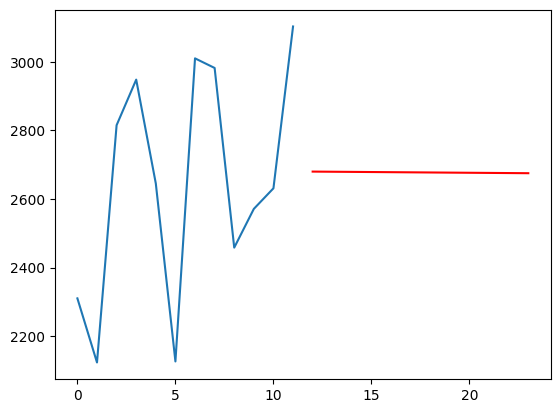

In [ ]:
# Plot predictions against actual values
plt.plot(test.Quantity)
plt.plot(predictions, color='red')
plt.show()

##### Auto ARIMA

In [ ]:
model = ARIMA(train.Quantity, order = (1,0,1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -85.320
Date:                Thu, 30 Mar 2023   AIC                            178.641
Time:                        22:56:42   BIC                            180.580
Sample:                             0   HQIC                           177.922
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2653.2840     46.451     57.121      0.000    2562.243    2744.325
ar.L1          0.2973      0.769      0.387      0.699      -1.209       1.804
ma.L1         -0.9985     90.384     -0.011      0.991    -178.147     176.150
sigma2      7.433e+04   6.69e+06      0.011      0.991    -1.3e+07    1.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.60   Prob(JB):                         0.87
Heteroskedasticity (H):               0.38   Skew:                            -0.29
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast for next 12 months
start_index = len(Train)
end_index = start_index + 11
forecast_best = res.predict(start = start_index, end = end_index)


forecast_best

12    2414.618837
13    2582.317011
14    2632.182013
15    2647.009357
16    2651.418264
17    2652.729251
18    2653.119072
19    2653.234986
20    2653.269452
21    2653.279701
22    2653.282748
23    2653.283655
Name: predicted_mean, dtype: float64

In [ ]:
# Evaluate forecasts
rmse_best = sqrt(mean_squared_error(test.Quantity, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 303.660


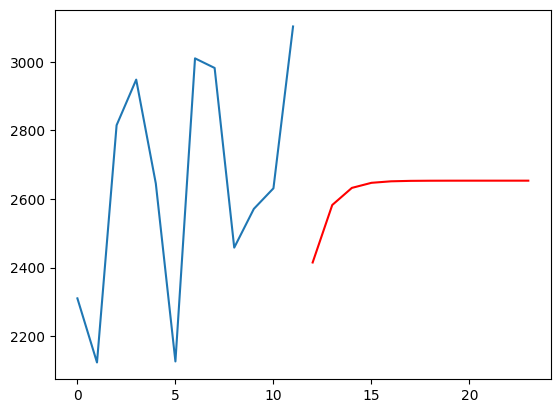

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test.Quantity)
pyplot.plot(forecast_best, color = 'red')
pyplot.show()

#### SARIMA

In [ ]:
from statsmodels.tsa.api import SARIMAX

model = SARIMAX(df_grouped['Quantity'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)  # 4 months * 4 weeks per month = 16 weeks
forecast

12    4258.000577
13    4071.000577
14    4763.000577
15    4896.000577
16    4593.000577
17    4074.000577
18    4958.000577
19    4930.000577
20    4406.000577
21    4519.000577
22    4579.000577
23    5051.000577
Name: predicted_mean, dtype: float64

In [ ]:
train = df_grouped.Quantity
test = df_grouped.Quantity
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

MAPE: nan


In [ ]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 1948.0005774997117


##### Moving Averages

In [ ]:
# Set the number of periods to average over
window_size = 4

# Calculate the moving average using rolling window
data['MA'] = df_grouped['Quantity'].rolling(window_size).mean()

# Print the data with moving average
df_grouped

Dateofbill  Quantity
0         Jan      2310
1         Feb      2123
2         Mar      2815
3         Apr      2948
4         May      2645
5         Jun      2126
6         Jul      3010
7         Aug      2982
8         Sep      2458
9         Oct      2571
10        Nov      2631
11        Dec      3103

##### Centered Moving Average

In [ ]:
data['CMA_3'] = df_grouped['Quantity'].rolling(window=3, center=True).mean()

# Calculate the centered moving average with window size 5 on Final_Sales
data['CMA_5'] = df_grouped['Quantity'].rolling(window=5, center=True).mean()

# Print the resulting dataframe with the added CMA columns
df_grouped

Dateofbill  Quantity
0         Jan      2310
1         Feb      2123
2         Mar      2815
3         Apr      2948
4         May      2645
5         Jun      2126
6         Jul      3010
7         Aug      2982
8         Sep      2458
9         Oct      2571
10        Nov      2631
11        Dec      3103

#### Holt-Winters Method

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='add', seasonal='mul')
model_fit = model.fit()

In [ ]:
# Make a forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2598.055232
13    2411.074283
14    2961.535534
15    3120.851329
16    2638.333939
17    2448.309830
18    3007.096251
19    3168.679038
20    2678.612647
21    2485.545376
22    3052.656969
23    3216.506747
dtype: float64

In [ ]:
# Prepare the train and test datasets
train =df_grouped.Quantity
test =df_grouped.Quantity

In [ ]:
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

MAPE: nan


In [ ]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 224.11850007753964


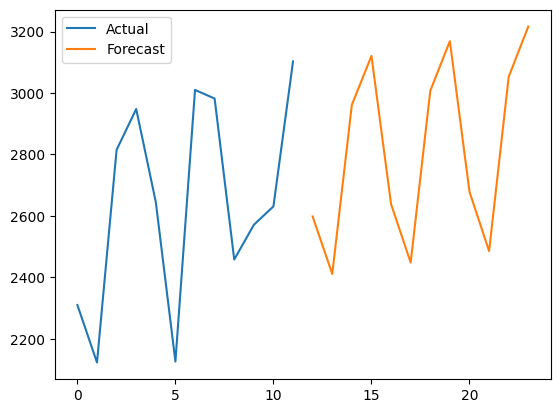

In [ ]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='mul', seasonal='add')
model_fit = model.fit()

In [ ]:
# Make a forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12     2823.735567
13     3067.931285
14     4240.969952
15     4920.967956
16     4896.584329
17     5426.036943
18     6923.588384
19     7972.757273
20     8368.348304
21     9375.570757
22    11416.640752
23    13084.124975
dtype: float64

In [ ]:
# Prepare the train and test datasets
train = df_grouped.Quantity
test = df_grouped.Quantity

In [ ]:
# Calculate the root mean squared error (RMSE) of the forecast
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

MAPE: nan
RMSE: 5174.547159441178


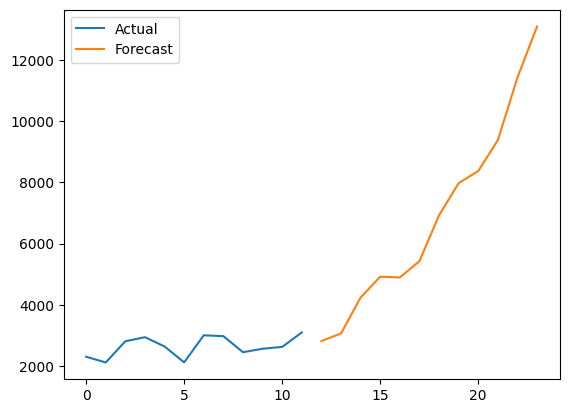

In [ ]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='add', seasonal='add')
model_fit = model.fit()

# Make a forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2533.216595
13    2340.851877
14    2954.741215
15    3123.022048
16    2568.746695
17    2376.381977
18    2990.271315
19    3158.552147
20    2604.276795
21    2411.912077
22    3025.801414
23    3194.082247
dtype: float64

In [ ]:
# Prepare the train and test datasets
train = df_grouped.Quantity
test = df_grouped.Quantity

# Calculate the root mean squared error (RMSE) of the forecast
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

MAPE: nan
RMSE: 195.44415148235015


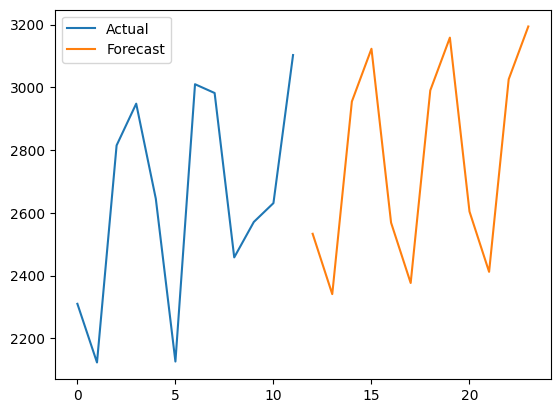

In [ ]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters method on training data
hw_model = ExponentialSmoothing(Train['Quantity'], seasonal_periods=6, trend='add', seasonal='add').fit()

# Make predictions on test data using the fitted model
pred_hw = hw_model.forecast(len(Test))

# Calculate MAPE between predicted and actual values
mape_hw = np.mean(np.abs((Test['Quantity'] - pred_hw) / Test['Quantity'])) * 100
mape_hw

nan

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='mul', seasonal='mul')
model_fit = model.fit()

# Make a forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12     2719.119580
13     2799.218047
14     4157.684660
15     4877.028214
16     4280.305364
17     4406.392463
18     6544.824319
19     7677.179842
20     6737.847848
21     6936.328007
22    10302.543091
23    12085.041902
dtype: float64

In [ ]:
# Prepare the train and test datasets
train =df_grouped.Quantity
test =df_grouped.Quantity

# Calculate the root mean squared error (RMSE) of the forecast
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 4334.604442614264


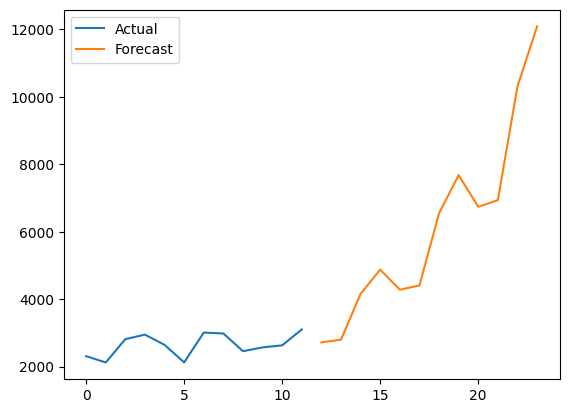

In [ ]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

##### Exponential Smoothing

In [ ]:
# Set the Date column as the index
# df_grouped.set_index('Dateofbill', inplace=True)
# Compute the rolling mean of the sales data using SES
alpha =1   # smoothing parameter
df_grouped['SES'] = df_grouped['Quantity'].ewm(alpha=alpha, adjust=False).mean()

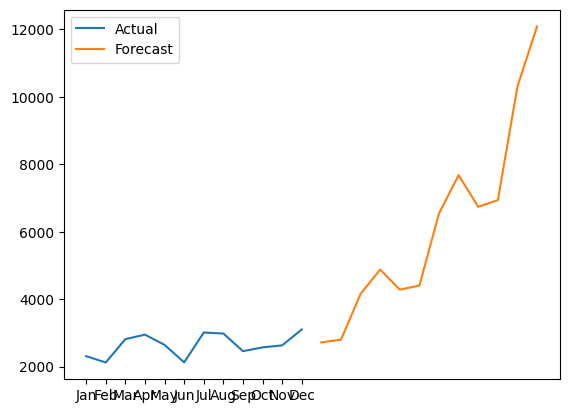

In [ ]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

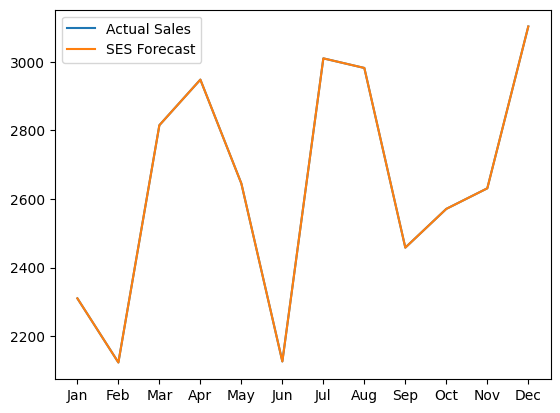

In [ ]:
# Plot the original sales data and the SES forecast
plt.plot(df_grouped['Quantity'], label='Actual Sales')
plt.plot(df_grouped['SES'], label='SES Forecast')
plt.legend()
plt.show()

##### Simple EXPSmoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(df_grouped['Quantity'])
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
forecast

12    2743.198308
13    2743.198308
14    2743.198308
15    2743.198308
16    2743.198308
17    2743.198308
18    2743.198308
19    2743.198308
20    2743.198308
21    2743.198308
22    2743.198308
23    2743.198308
dtype: float64

In [ ]:
train = df_grouped.Quantity
test = df_grouped.Quantity
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 340.4932734321902


##### VECM